In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Evaluvating
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,RocCurveDisplay,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score

In [4]:
from sklearn.svm import SVC

In [5]:
features=pd.read_csv('/content/drive/MyDrive/feature_layers.csv')

In [6]:
features

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,Category,Link,l1,l2,l3,l4,l5,l6,l7,l8
0,52.868929,341.160000,5,0.000000,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.765286,3.063670,-1.241425,-2.918709,-0.638591,-2.337858,-3.083381,1.471569
1,232.497760,618.666667,5,0.000000,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.431634,-0.266545,-0.164840,-1.013374,-0.096531,-2.114711,-2.053948,4.422954
2,556.876165,105.000000,5,0.000000,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.694021,2.885792,-1.163235,-2.808314,-0.572257,-2.263400,-2.984500,1.584811
3,286.433345,291.000000,5,70.179114,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.415235,-0.279241,-0.149516,-0.968341,-0.096128,-2.132139,-2.043475,4.483900
4,291.363794,325.250000,5,29.786827,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.434111,-0.312268,-0.159916,-0.994051,-0.104884,-2.071969,-2.038159,4.325556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,66.179395,1701.000000,-5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.298842,4.041442,-1.743290,-3.465853,-1.022378,-2.819593,-3.661809,1.101511
2261,38.100008,695.000000,-5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.285806,4.019737,-1.730017,-3.453998,-1.016245,-2.803669,-3.646116,1.097060
2262,321.598929,351.000000,5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.537415,4.379735,-2.018789,-3.723891,-1.278366,-3.068478,-3.987518,0.964546
2263,14.597426,899.000000,-5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.155199,3.774894,-1.601443,-3.339185,-0.925257,-2.682301,-3.509608,1.154997


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pen Pressure    2265 non-null   float64
 1   Line Spacing    2265 non-null   float64
 2   Slant Angle     2265 non-null   int64  
 3   Baseline angle  2265 non-null   float64
 4   Category        2265 non-null   bool   
 5   Link            2265 non-null   object 
 6   l1              2265 non-null   float64
 7   l2              2265 non-null   float64
 8   l3              2265 non-null   float64
 9   l4              2265 non-null   float64
 10  l5              2265 non-null   float64
 11  l6              2265 non-null   float64
 12  l7              2265 non-null   float64
 13  l8              2265 non-null   float64
dtypes: bool(1), float64(11), int64(1), object(1)
memory usage: 232.4+ KB


In [8]:
labels=features['Category']
features.drop(['Link','Category'],axis=1,inplace=True)

In [9]:
features

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,l1,l2,l3,l4,l5,l6,l7,l8
0,52.868929,341.160000,5,0.000000,-1.765286,3.063670,-1.241425,-2.918709,-0.638591,-2.337858,-3.083381,1.471569
1,232.497760,618.666667,5,0.000000,-1.431634,-0.266545,-0.164840,-1.013374,-0.096531,-2.114711,-2.053948,4.422954
2,556.876165,105.000000,5,0.000000,-1.694021,2.885792,-1.163235,-2.808314,-0.572257,-2.263400,-2.984500,1.584811
3,286.433345,291.000000,5,70.179114,-1.415235,-0.279241,-0.149516,-0.968341,-0.096128,-2.132139,-2.043475,4.483900
4,291.363794,325.250000,5,29.786827,-1.434111,-0.312268,-0.159916,-0.994051,-0.104884,-2.071969,-2.038159,4.325556
...,...,...,...,...,...,...,...,...,...,...,...,...
2260,66.179395,1701.000000,-5,0.000000,-2.298842,4.041442,-1.743290,-3.465853,-1.022378,-2.819593,-3.661809,1.101511
2261,38.100008,695.000000,-5,0.000000,-2.285806,4.019737,-1.730017,-3.453998,-1.016245,-2.803669,-3.646116,1.097060
2262,321.598929,351.000000,5,0.000000,-2.537415,4.379735,-2.018789,-3.723891,-1.278366,-3.068478,-3.987518,0.964546
2263,14.597426,899.000000,-5,0.000000,-2.155199,3.774894,-1.601443,-3.339185,-0.925257,-2.682301,-3.509608,1.154997


[Text(0.5, 0, 'Pen Pressure'), Text(0, 0.5, 'Baseline angle')]

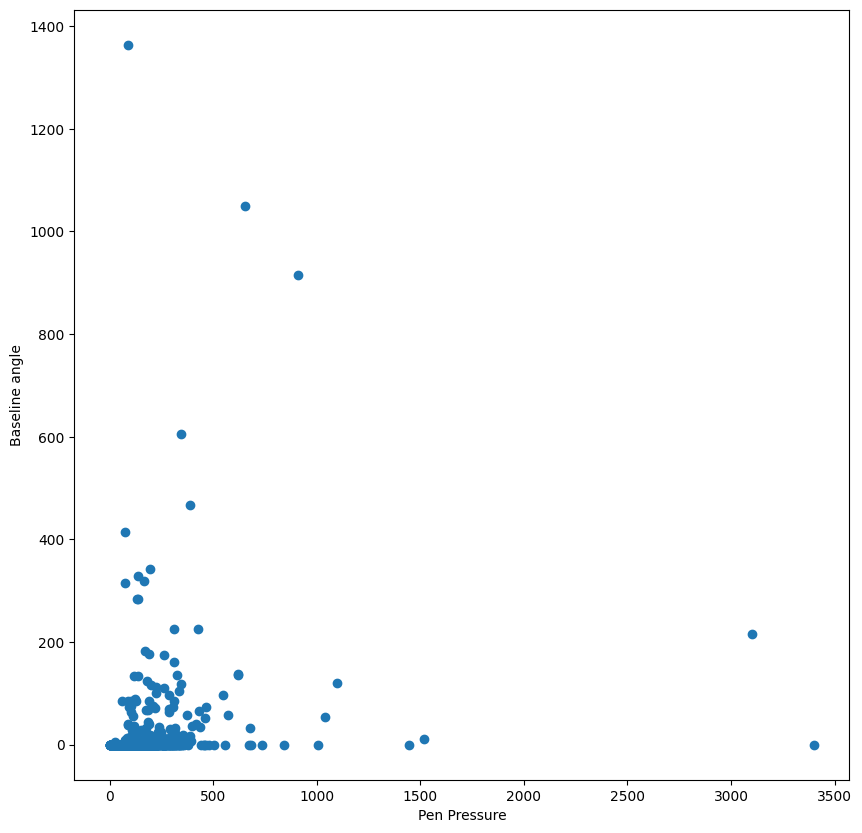

In [10]:
ig,ax=plt.subplots(figsize=(10,10))
mp=ax.scatter(features['Pen Pressure'],features['Baseline angle'])
#mp=ax.scatter(dk.age[dk.cp==0],dk.trestbps[dk.cp==0])
ax.legend
ax.set(xlabel="Pen Pressure",ylabel="Baseline angle")



[Text(0.5, 0, 'Slant angle'), Text(0, 0.5, 'Baseline angle')]

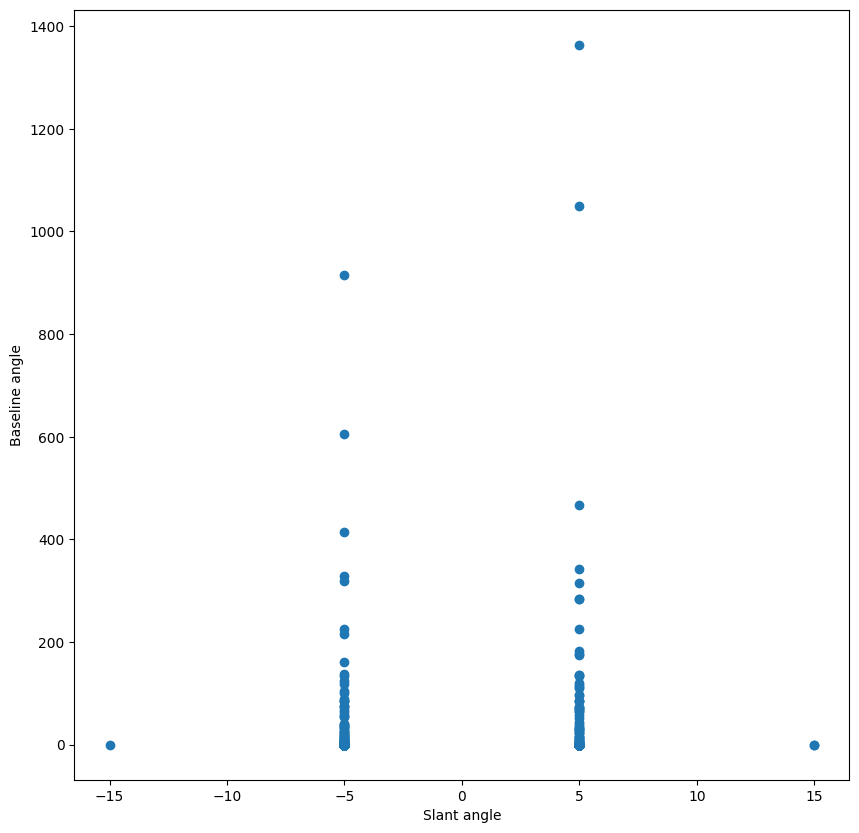

In [11]:
ig,ax=plt.subplots(figsize=(10,10))
mp=ax.scatter(features['Slant Angle'],features['Baseline angle'])

ax.legend
ax.set(xlabel="Slant angle",ylabel="Baseline angle")

In [12]:
features.corr()

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,l1,l2,l3,l4,l5,l6,l7,l8
Pen Pressure,1.000000,-0.089114,0.012006,0.224771,0.001878,-0.195200,0.010733,0.040731,-0.002904,-0.031438,0.000745,0.235603
Line Spacing,-0.089114,1.000000,-0.060457,-0.036899,-0.067642,0.100630,-0.048259,-0.047398,-0.056440,-0.038736,-0.041040,-0.090996
Slant Angle,0.012006,-0.060457,1.000000,0.019430,0.030852,-0.083245,0.020091,0.024518,0.023943,0.008247,0.013145,0.093812
Baseline angle,0.224771,-0.036899,0.019430,1.000000,0.077453,-0.176837,0.079939,0.088915,0.073717,0.049480,0.068168,0.205150
l1,0.001878,-0.067642,0.030852,0.077453,1.000000,-0.854304,0.980552,0.970132,0.991828,0.969742,0.970928,0.693375
l2,-0.195200,0.100630,-0.083245,-0.176837,-0.854304,1.000000,-0.800680,-0.818482,-0.816803,-0.737241,-0.765871,-0.929456
l3,0.010733,-0.048259,0.020091,0.079939,0.980552,-0.800680,1.000000,0.995873,0.996045,0.992457,0.997657,0.671090
l4,0.040731,-0.047398,0.024518,0.088915,0.970132,-0.818482,0.995873,1.000000,0.987571,0.983905,0.993251,0.705599
l5,-0.002904,-0.056440,0.023943,0.073717,0.991828,-0.816803,0.996045,0.987571,1.000000,0.987646,0.990718,0.675241
l6,-0.031438,-0.038736,0.008247,0.049480,0.969742,-0.737241,0.992457,0.983905,0.987646,1.000000,0.997263,0.580345


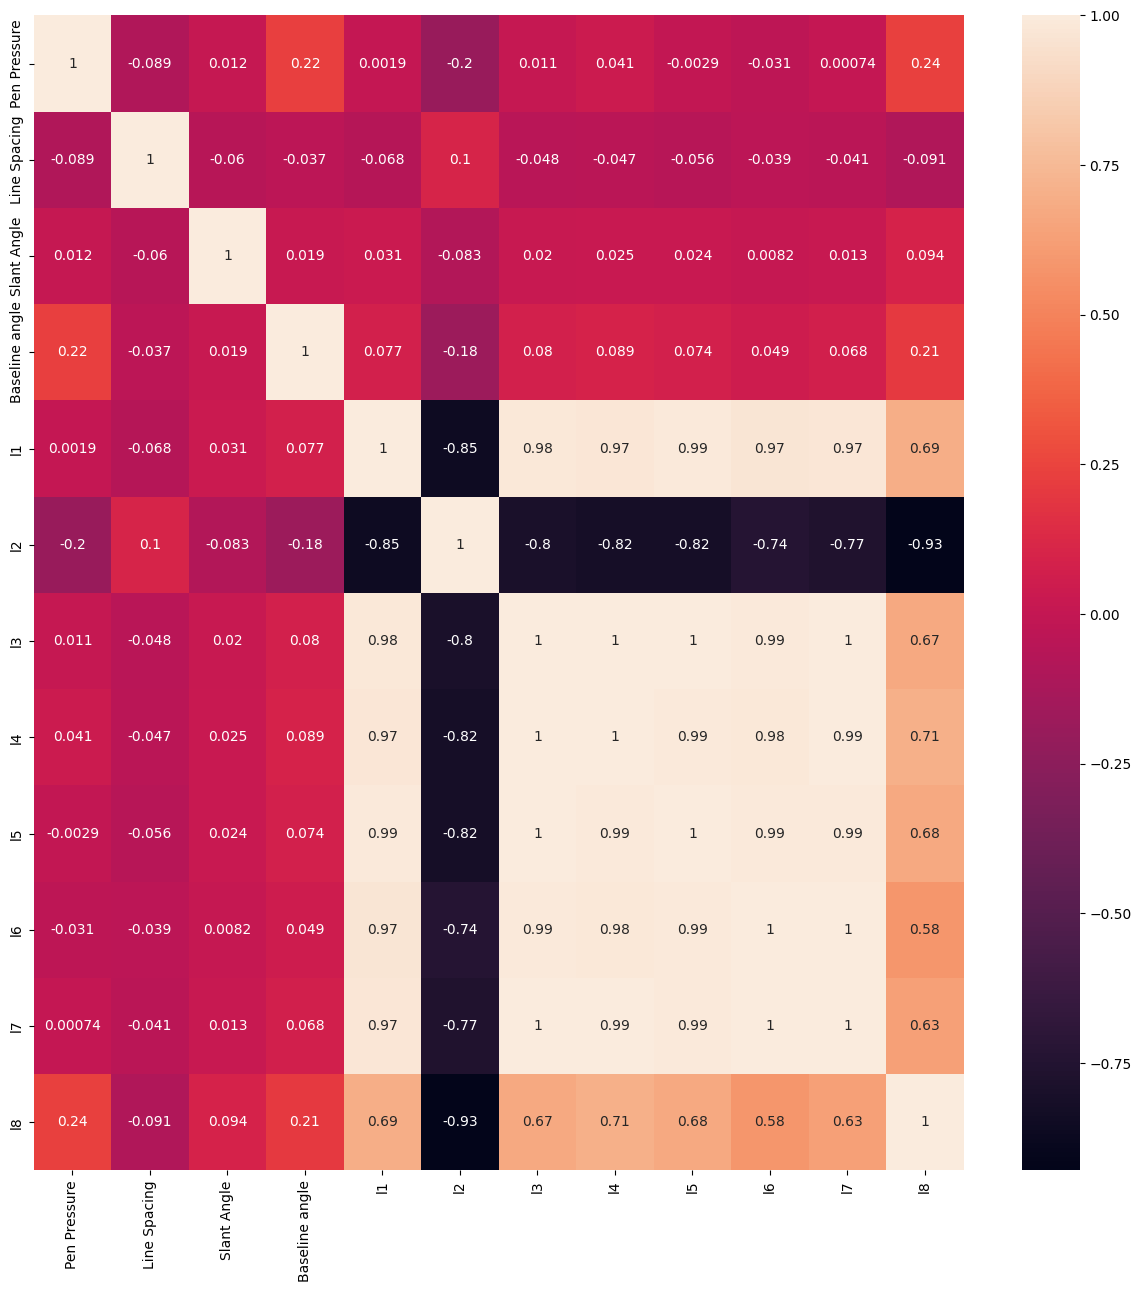

In [13]:
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(data=features.corr(),annot=True)

In [14]:
def mdlscr(model,x_tr,x_t,y_tr,y_t):
     model.fit(x_tr,y_tr)
     print(model.score(x_t,y_t))
     return model

In [15]:
ans={}
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(features,labels,train_size=0.9)
print("random forest classifier")
ans["RandomForestClassifier"]=mdlscr(RandomForestClassifier(),x_train,x_test,y_train,y_test)
print("Logistic Regression")
ans["LogisticRegression"]=mdlscr(LogisticRegression(),x_train,x_test,y_train,y_test)
print("kNeighbour")
ans["kNeighbour"]=mdlscr(KNeighborsClassifier(),x_train,x_test,y_train,y_test)
print("Decision Tree")
ans["dtree"]=mdlscr(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

random forest classifier
0.973568281938326
Logistic Regression
0.9647577092511013
kNeighbour
0.9691629955947136
Decision Tree
0.9559471365638766


In [16]:
svr={}
print("linear")
svr['Linear']=mdlscr(SVC(kernel='linear',C=10),x_train,x_test,y_train,y_test)
print("poly")
svr['Poly']=mdlscr(SVC(kernel='poly',C=2),x_train,x_test,y_train,y_test)
print("sigmoid")
svr['sigmoid']=mdlscr(SVC(kernel='sigmoid',C=2),x_train,x_test,y_train,y_test)
print("rbf")
svr['rbf']=mdlscr(SVC(kernel='rbf',C=2),x_train,x_test,y_train,y_test)



linear
0.960352422907489
poly
0.947136563876652
sigmoid
0.9295154185022027
rbf
0.9515418502202643


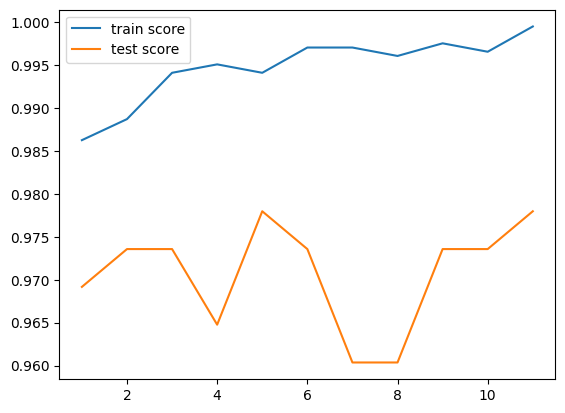

In [18]:
b_model=RandomForestClassifier()
train_score=[]
test_score=[]
n_estimators=range(1,12)
for i in n_estimators:
    b_model.set_params(n_estimators=i)
    b_model.fit(x_train,y_train)
    train_score.append(b_model.score(x_train,y_train))
    test_score.append(b_model.score(x_test,y_test))
plt.plot(n_estimators,train_score,label="train score")
plt.plot(n_estimators,test_score,label="test score")
# plt.xlabel("n_estimators")
# plt.ylabel("score")
plt.legend()


In [19]:
def evaluvate(model,x,y):
    y_predict=model.predict(x)
    print(classification_report(y,y_predict))
    ConfusionMatrixDisplay.from_predictions(y,y_predict)

Random Forest Regression
              precision    recall  f1-score   support

       False       0.98      0.99      0.99       215
        True       0.80      0.67      0.73        12

    accuracy                           0.97       227
   macro avg       0.89      0.83      0.86       227
weighted avg       0.97      0.97      0.97       227



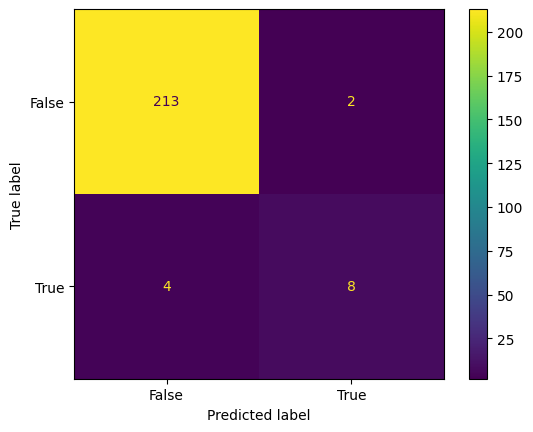

In [20]:
print("Random Forest Regression")
evaluvate(ans["RandomForestClassifier"],x_test,y_test)

Logistic Regression
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       215
        True       1.00      0.33      0.50        12

    accuracy                           0.96       227
   macro avg       0.98      0.67      0.74       227
weighted avg       0.97      0.96      0.96       227



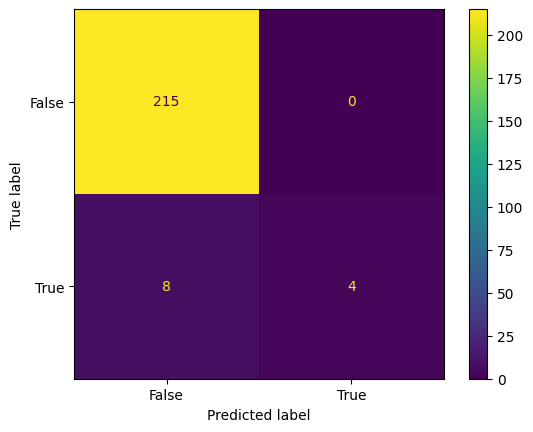

In [21]:
print("Logistic Regression")
evaluvate(ans["LogisticRegression"],x_test,y_test)

kneighbour
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       215
        True       1.00      0.42      0.59        12

    accuracy                           0.97       227
   macro avg       0.98      0.71      0.79       227
weighted avg       0.97      0.97      0.96       227



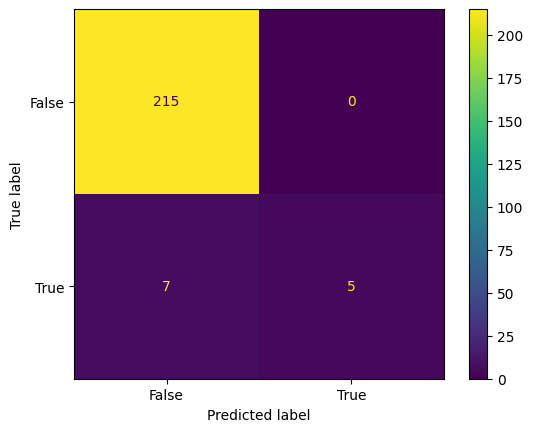

In [22]:
print("kneighbour")
evaluvate(ans["kNeighbour"],x_test,y_test)

Decision Tree
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       215
        True       0.58      0.58      0.58        12

    accuracy                           0.96       227
   macro avg       0.78      0.78      0.78       227
weighted avg       0.96      0.96      0.96       227



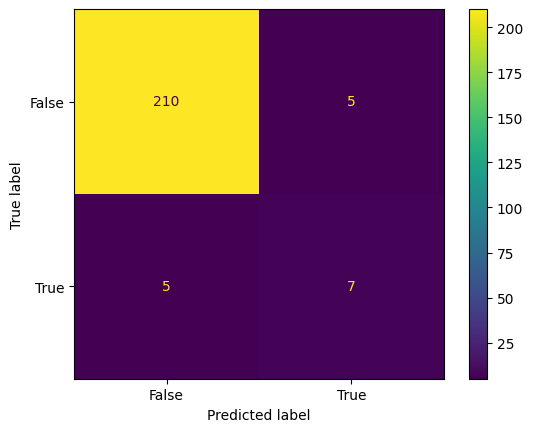

In [23]:
print("Decision Tree")
evaluvate(ans["dtree"],x_test,y_test)

Now for svms

linear
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       215
        True       0.80      0.33      0.47        12

    accuracy                           0.96       227
   macro avg       0.88      0.66      0.72       227
weighted avg       0.96      0.96      0.95       227



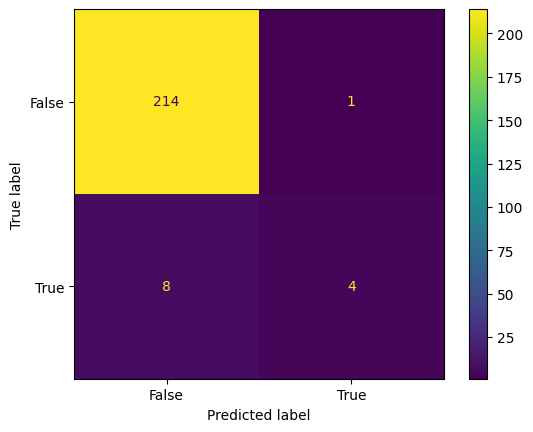

In [24]:
print("linear")
evaluvate(svr["Linear"],x_test,y_test)

Poly
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       215
        True       0.00      0.00      0.00        12

    accuracy                           0.95       227
   macro avg       0.47      0.50      0.49       227
weighted avg       0.90      0.95      0.92       227



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


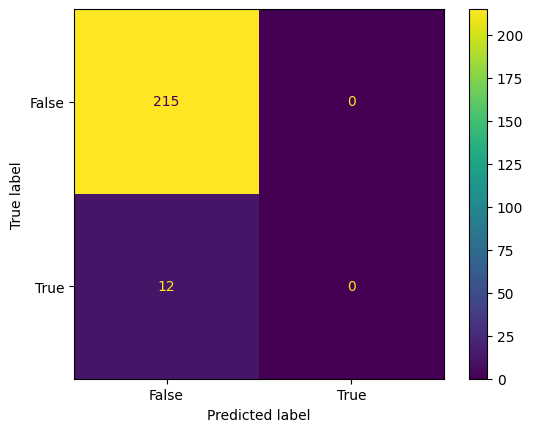

In [25]:
print("Poly")
evaluvate(svr["Poly"],x_test,y_test)

rbf
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       215
        True       1.00      0.08      0.15        12

    accuracy                           0.95       227
   macro avg       0.98      0.54      0.56       227
weighted avg       0.95      0.95      0.93       227



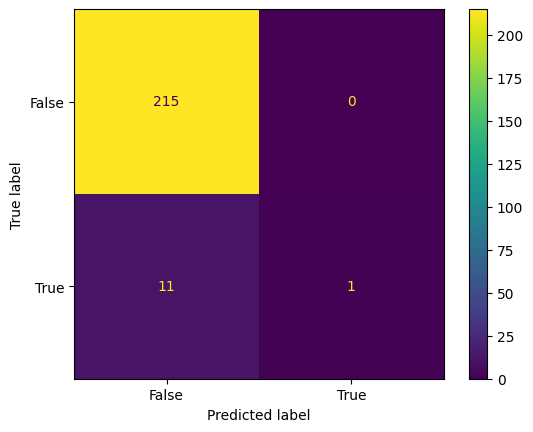

In [26]:
print("rbf")
evaluvate(svr["rbf"],x_test,y_test)


sigmoid
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       215
        True       0.25      0.17      0.20        12

    accuracy                           0.93       227
   macro avg       0.60      0.57      0.58       227
weighted avg       0.92      0.93      0.92       227



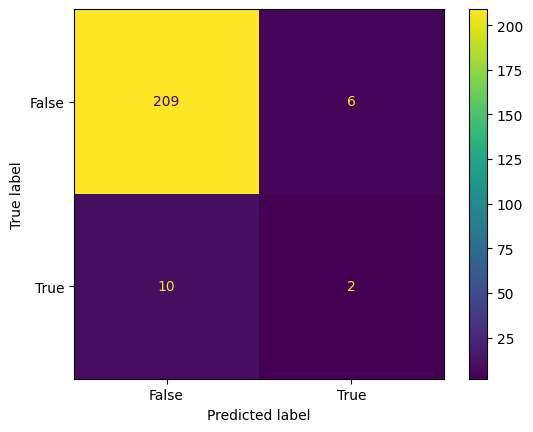

In [27]:
print("sigmoid")
evaluvate(svr["sigmoid"],x_test,y_test)

## Since Random Tree Seems to work best. Lets continue with it

In [32]:
ht={
    "n_estimators": range(10,20,1),
    "max_depth":  range(0,20,2),
    "min_samples_split": range(1,20,2),
    "min_samples_leaf": range(1,20,2)
}
nb_model=GridSearchCV(ans["RandomForestClassifier"],ht,cv=3,n_jobs=-1,verbose=2)

In [33]:
nb_model.fit(x_train,y_train)

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5700 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklear

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(0, 20, 2),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(1, 20, 2),
                         'n_estimators': range(10, 20)},
             verbose=2)

In [34]:
nb_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 19,
 'n_estimators': 17}

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       215
        True       0.86      0.50      0.63        12

    accuracy                           0.97       227
   macro avg       0.91      0.75      0.81       227
weighted avg       0.97      0.97      0.97       227



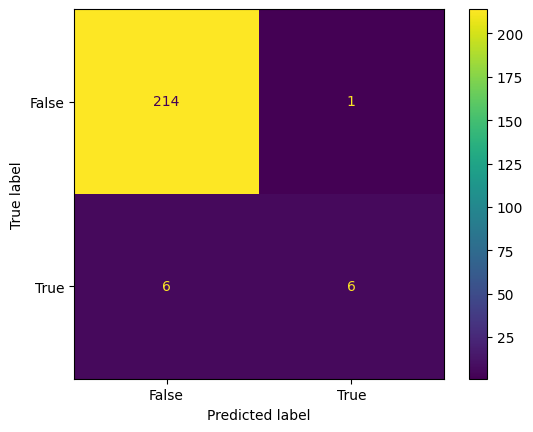

In [35]:
evaluvate(nb_model,x_test,y_test)

In [36]:
features2=pd.read_csv('/content/drive/MyDrive/feature_layers.csv')

In [38]:
ft_tr=features2[features2['Category']==True]

In [39]:
ft_tr

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,Category,Link,l1,l2,l3,l4,l5,l6,l7,l8
0,52.868929,341.160000,5,0.000000,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.765286,3.063670,-1.241425,-2.918709,-0.638591,-2.337858,-3.083381,1.471569
1,232.497760,618.666667,5,0.000000,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.431634,-0.266545,-0.164840,-1.013374,-0.096531,-2.114711,-2.053948,4.422954
2,556.876165,105.000000,5,0.000000,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.694021,2.885792,-1.163235,-2.808314,-0.572257,-2.263400,-2.984500,1.584811
3,286.433345,291.000000,5,70.179114,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.415235,-0.279241,-0.149516,-0.968341,-0.096128,-2.132139,-2.043475,4.483900
4,291.363794,325.250000,5,29.786827,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.434111,-0.312268,-0.159916,-0.994051,-0.104884,-2.071969,-2.038159,4.325556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,308.400209,210.000000,5,23.482151,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.450378,1.256460,-0.668285,-2.124963,-0.369338,-1.869806,-2.258132,2.026602
94,549.311920,160.000000,5,97.446474,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.465929,1.664727,-0.791091,-2.270085,-0.416987,-1.873155,-2.330943,1.712864
95,12.188425,32473.760000,5,0.000000,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.485565,2.023128,-0.874832,-2.384579,-0.438185,-1.930263,-2.448191,1.576629
96,0.086254,899.000000,5,0.000000,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.570569,2.577737,-1.034079,-2.611350,-0.492117,-2.109498,-2.762687,1.611250


In [40]:
ft_fl=features2[features2['Category']==False]

In [41]:
ft_fl

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,Category,Link,l1,l2,l3,l4,l5,l6,l7,l8
98,18.398231,899.000000,-5,0.0,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.084618,3.654128,-1.536954,-3.275558,-0.878050,-2.625598,-3.434578,1.192500
99,43.735204,899.000000,-5,0.0,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.281255,4.011873,-1.720709,-3.471438,-1.018506,-2.798534,-3.648912,1.104625
100,13.656109,45.000000,5,0.0,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.252178,3.956631,-1.693714,-3.441512,-0.997395,-2.771081,-3.617114,1.114491
101,59.818078,4049.805556,5,0.0,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.551166,4.396621,-2.035669,-3.738840,-1.293990,-3.080118,-4.004603,0.952533
102,19.425327,898.000000,-5,0.0,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.261350,3.971705,-1.707289,-3.431074,-0.995557,-2.784174,-3.621952,1.115894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,66.179395,1701.000000,-5,0.0,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.298842,4.041442,-1.743290,-3.465853,-1.022378,-2.819593,-3.661809,1.101511
2261,38.100008,695.000000,-5,0.0,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.285806,4.019737,-1.730017,-3.453998,-1.016245,-2.803669,-3.646116,1.097060
2262,321.598929,351.000000,5,0.0,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.537415,4.379735,-2.018789,-3.723891,-1.278366,-3.068478,-3.987518,0.964546
2263,14.597426,899.000000,-5,0.0,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.155199,3.774894,-1.601443,-3.339185,-0.925257,-2.682301,-3.509608,1.154997


In [42]:
ft_fl=ft_fl.sample(110)

In [43]:
ft_fl

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,Category,Link,l1,l2,l3,l4,l5,l6,l7,l8
1013,58.638048,2127.555556,5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-1.824031,3.184690,-1.300563,-2.995255,-0.686445,-2.396002,-3.149097,1.388980
1576,60.132443,502.810000,-5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.174303,3.809707,-1.618435,-3.364220,-0.940035,-2.700122,-3.532605,1.148993
2129,38.248225,3438.959184,5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.378911,4.178854,-1.821058,-3.566792,-1.103182,-2.893110,-3.763402,1.063685
1828,51.499878,357.555556,-5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.594243,4.437757,-2.081278,-3.777415,-1.334024,-3.118160,-4.051583,0.915436
789,57.474865,8827.666667,-5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-1.856843,3.249852,-1.333080,-3.036617,-0.712477,-2.428356,-3.184364,1.344051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,203.938822,256.000000,-5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-1.893174,3.318275,-1.367729,-3.076237,-0.739826,-2.465051,-3.222605,1.302152
336,44.529482,3926.560000,5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.460490,4.293282,-1.932793,-3.644844,-1.195405,-2.986204,-3.884765,0.985376
1373,87.790334,2186.500000,5,1363.664609,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.312011,4.070262,-1.753863,-3.490634,-1.040554,-2.823257,-3.677851,1.079200
1752,56.713168,1005.960000,-5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.332425,4.106713,-1.776727,-3.498444,-1.047857,-2.848494,-3.697871,1.081786


In [46]:
features=ft_tr.append(ft_fl)

<ipython-input-46-9bbf6134d43a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features=ft_tr.append(ft_fl)


In [47]:
features

,Pen Pressure,Line Spacing,Slant Angle,Baseline angle,Category,Link,l1,l2,l3,l4,l5,l6,l7,l8
0,52.868929,341.160000,5,0.000000,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.765286,3.063670,-1.241425,-2.918709,-0.638591,-2.337858,-3.083381,1.471569
1,232.497760,618.666667,5,0.000000,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.431634,-0.266545,-0.164840,-1.013374,-0.096531,-2.114711,-2.053948,4.422954
2,556.876165,105.000000,5,0.000000,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.694021,2.885792,-1.163235,-2.808314,-0.572257,-2.263400,-2.984500,1.584811
3,286.433345,291.000000,5,70.179114,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.415235,-0.279241,-0.149516,-0.968341,-0.096128,-2.132139,-2.043475,4.483900
4,291.363794,325.250000,5,29.786827,True,/content/drive/MyDrive/datad/Dysgraphia/dysgra...,-1.434111,-0.312268,-0.159916,-0.994051,-0.104884,-2.071969,-2.038159,4.325556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,203.938822,256.000000,-5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-1.893174,3.318275,-1.367729,-3.076237,-0.739826,-2.465051,-3.222605,1.302152
336,44.529482,3926.560000,5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.460490,4.293282,-1.932793,-3.644844,-1.195405,-2.986204,-3.884765,0.985376
1373,87.790334,2186.500000,5,1363.664609,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.312011,4.070262,-1.753863,-3.490634,-1.040554,-2.823257,-3.677851,1.079200
1752,56.713168,1005.960000,-5,0.000000,False,/content/drive/MyDrive/datad/Normal/dysgraphia...,-2.332425,4.106713,-1.776727,-3.498444,-1.047857,-2.848494,-3.697871,1.081786


In [49]:
labels=features['Category']
features.drop(['Link','Category'],axis=1,inplace=True)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,train_size=0.9)
Random_100=mdlscr(RandomForestClassifier(),x_train,x_test,y_train,y_test)

0.9523809523809523


              precision    recall  f1-score   support

       False       0.90      1.00      0.95         9
        True       1.00      0.92      0.96        12

    accuracy                           0.95        21
   macro avg       0.95      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



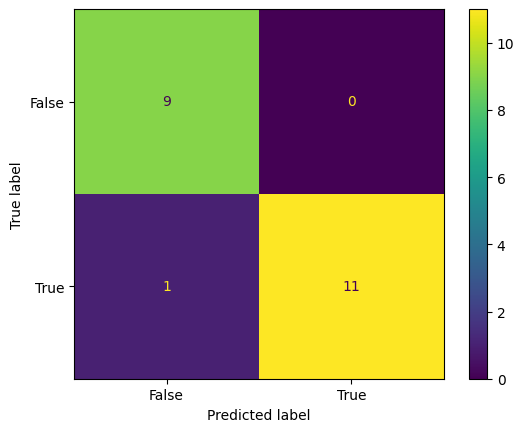

In [51]:
evaluvate(Random_100,x_test,y_test)